# Example of application of the sdlabb package for metadata extaction
# NCOF method
Created 13-11-20

Author: Fredrik Möller 



# Step 1: Load and preprocess data.

### Currently the the sdlabb package can only handle inputs of type `list`. As the data is loaded from a `csv`-file it needs to be transformed into the correct format.

Data is loaded from the folder and file specified in the 'congi.ini' file. See README for further clarification 

In [2]:
from alpacka.pipes import data_process

data_p = data_process.data_process('config.ini')

data , labels = data_p.load_file('text', 'label')

Loading data from ~\Documents\Recorded Future\Project-emp\Data\violence_data_nov10.csv
Dropping any NAN objects from the data
Removing any non str objects from the data


### Quick investigation of the current status of the data.

In [3]:
nr_pos = sum(labels)
prec_pos = (nr_pos/len(labels))*100
prec_neg = 100 - prec_pos 
print(f"Number of samples in Data {len(data)}")
print(f"Distrubution of the classes")
print(f"Positive class: {round(prec_pos,2)} % {nr_pos} samples")
print(f"Negative class: {round(prec_neg,2)}. {len(data)-nr_pos} samples")

Number of samples in Data 40656
Distrubution of the classes
Positive class: 4.46 % 1812 samples
Negative class: 95.54. 38844 samples


# Application of the NCOF method to the data:


#### Start with importing and creating an instance of the `NCOF` class 

The setup for the ncof-class is loaded based on settings specified in the 'congi.ini' file. See README for further clarification 

In [4]:
from alpacka.pipes import ncof_pipeline



print(f"Creating NCOF class object")
NCOF = ncof_pipeline.ncof_pipeline('config.ini')
NCOF.set_verbose(False)
NCOF.num_words = False

print(f"Calculating NCOF score for the unprocessed data set")
NCOF.calc_ncof(data, labels)
print(f"done")



Creating NCOF class object
Calculating NCOF score for the unprocessed data set
done


#### Currently there are no set length restrictions of the number of words that are represented. This makes it so that all unique word in the data set will be represented and get a NCOF score. 

#### After the `calc_NCOF` method have been called the dictionary for the data set and the vector containing the NCOF score can be access by calling the `get_dict` & `get_score` methods respectively


#### The more common a word is in the data set the lower its index is. Such that the most common word has index 0, the second most common has index 1, etc.

In [5]:
print(f"Accessing the 5 first elements in the dictionary for the dataset")
d = NCOF.get_dict()
print([d.get(i) for i in range(6)])

print(f"Accessing the corresponding NCOF score for these words")
s = NCOF.get_score()
print(s[range(6)])


Accessing the 5 first elements in the dictionary for the dataset
['att', 'och', 'det', 'som', 'är', 'i']
Accessing the corresponding NCOF score for these words
[-0.00442982  0.00313823 -0.00087284 -0.00268846 -0.00121464 -0.00221725]


#### Next step is to extract the words with the NCOF-scores that lie $\mu \pm 1-3 \sigma$, (mean plus minus 1 to 3 standard deviations).

These outliers are sorted such that the words that lie inside each sigma bracked are grouped with eachother. 

#### The index outliers can be accessed from the NCOF object by calling the `get_pos_outliers` & `get_neg_outliers` respectively. The inliers can be accessed through `get_inliers`

In [6]:
NCOF.split_score()

print(f"Outliers in the 1-2 sigma bracket:")
print(f"Positive class: {len(NCOF.get_pos_outliers()[0])} words")
print(f"Negative class: {len(NCOF.get_neg_outliers()[0])} words")
print(f"")
print(f"Outliers in the 2-3 sigma bracket:")
print(f"Positive class: {len(NCOF.get_pos_outliers()[1])} words")
print(f"Negative class: {len(NCOF.get_neg_outliers()[1])} words")
print(f"")
print(f"Outliers in the +3 sigma bracket:")
print(f"Positive class: {len(NCOF.get_pos_outliers()[2])} words")
print(f"Negative class: {len(NCOF.get_neg_outliers()[2])} words")

Outliers in the 1-2 sigma bracket:
Positive class: 88 words
Negative class: 70 words

Outliers in the 2-3 sigma bracket:
Positive class: 20 words
Negative class: 26 words

Outliers in the +3 sigma bracket:
Positive class: 63 words
Negative class: 38 words


#### The score can also be plotted to get a visual indication regarding the NCOF score over the data set

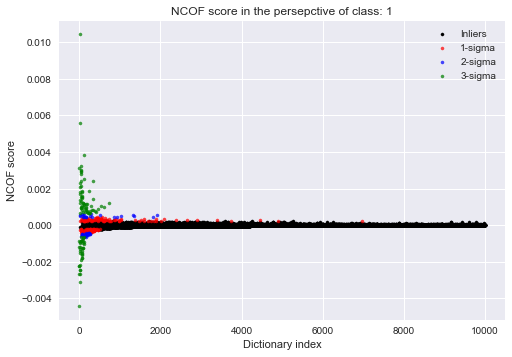

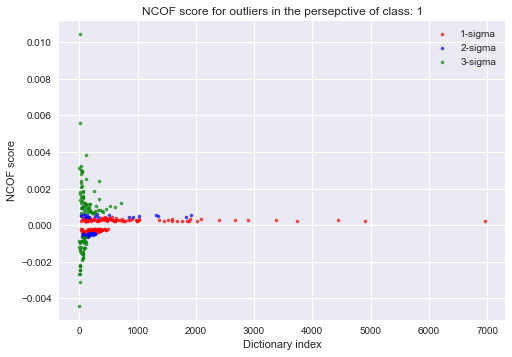

In [7]:
NCOF.scatter()

#### It can be noted that it appears that generally the more common a word is to the data set the more common it is to be skewed towards either class. 

#### The identified outliers can then be extracted as word so that a manual inspection regarding the conted can be performed. The outliers words are accessed by transformining them from integer indexes back to text by calling the `ind_2_txt` method. All outliers from each class can be transformed in one go

In [8]:
pos_words = NCOF.ind_2_txt(NCOF.get_pos_outliers())
       

neg_words = NCOF.ind_2_txt(NCOF.get_neg_outliers())


nr = 15
print(f"Presenting the 15 first examples for each sigma bracket for the two classes:")
print(f"")
print(f"")

print(f"Positive class:")
print(f"1-2 Sigma bracket: {pos_words[0][:nr]}")
print(f"")
print(f"2-3 Sigma bracket: {pos_words[1][:nr]}")
print(f"")
print(f"+3 Sigma bracket: {pos_words[2][:nr]}")
print(f"")

print(f"")
print(f"Negative class:")
print(f"1-2 Sigma bracket: {neg_words[0][:nr]}")
print(f"")
print(f"2-3 Sigma bracket: {neg_words[1][:nr]}")
print(f"")
print(f"+3 Sigma bracket: {neg_words[2][:nr]}")



Presenting the 15 first examples for each sigma bracket for the two classes:


Positive class:
1-2 Sigma bracket: ['eller', 'ha', 'upp', 'mycket', 'kanske', 'deras', 'tycker', 'över', 'sen', 'lite', 'säger', 'eftersom', 'sätt', 'innan', 'ja']

2-3 Sigma bracket: ['men', 'sig', 'blir', 'sina', 'gör', 'din', 'ner', 'o', 'oss', 'mina', 'djur', 'världen', 'skjutas', 'vårt', 'hota']

+3 Sigma bracket: ['och', 'jag', 'de', 'så', 'döda', 'man', 'kan', 'ett', 'skulle', 'någon', 'ska', 'då', 'dom', 'vi', 'alla']


Negative class:
1-2 Sigma bracket: ['när', 'ju', 'vill', 'där', 'ut', 'vad', 'människor', 'även', 'sverige', 'ingen', 'samma', 'går', 'två', 'vilket', 'flera']

2-3 Sigma bracket: ['vara', 'andra', 'många', 'något', 'dödade', 'detta', 'år', 'under', 'blev', 'allt', 'hans', 'vid', 'hängde', 'blivit', 'alltså']

+3 Sigma bracket: ['att', 'det', 'som', 'är', 'i', 'en', 'inte', 'på', 'för', 'med', 'om', 'du', 'har', 'av', 'han']


#### It should be noted that stop words have not been removed from the outliers. 

#### The stop words currently used were pulled from the web, from some site claiming to present the 929 most commonly used in the swedish language. 
#### the stop words can be access by calling the `get_stop_words` method, this function has two inputs, the path to the stop words file and the number of stop words to be used, max is 929 words. 


In [9]:
stop_words = data_p.load_stop_words(nr_words = 200)
nr = 10
print(f"The {nr} most commonly used words are {stop_words[:nr]}")

Loading 200 stop words from Stopord.txt
The 10 most commonly used words are ['i', 'och', 'att', 'det', 'som', 'en', 'på', 'är', 'av', 'för']


#### The stop words can then be removed from the identifed outliers by using the `remove_stop_words` method. This method takes the input format of `words_pos` and `words_neg`

In [10]:
words_pos_no_stop_words = NCOF.remove_stop_words(pos_words , stop_words)

words_neg_no_stop_words = NCOF.remove_stop_words(neg_words , stop_words)

print(f"Words present in the sigma brackets after stop word removal")
print(f"")
print(f"Outliers in the 1-2 sigma bracket:")
print(f"Positive class: {len(words_pos_no_stop_words[0])} words, down from {len(NCOF.get_pos_outliers()[0])} words")
print(f"Negative class: {len(words_neg_no_stop_words[0])} words, down from {len(NCOF.get_neg_outliers()[0])} words")
print(f"")
print(f"Outliers in the 2-3 sigma bracket:")
print(f"Positive class: {len(words_pos_no_stop_words[1])} words, down from {len(NCOF.get_pos_outliers()[1])} words")
print(f"Negative class: {len(words_neg_no_stop_words[1])} words, down from {len(NCOF.get_neg_outliers()[1])} words")
print(f"")
print(f"Outliers in the +3 sigma bracket:")
print(f"Positive class: {len(words_pos_no_stop_words[2])} words, down from {len(NCOF.get_pos_outliers()[2])} words")
print(f"Negative class: {len(words_neg_no_stop_words[2])} words, down from {len(NCOF.get_neg_outliers()[2])} words")

Words present in the sigma brackets after stop word removal

Outliers in the 1-2 sigma bracket:
Positive class: 67 words, down from 88 words
Negative class: 41 words, down from 70 words

Outliers in the 2-3 sigma bracket:
Positive class: 14 words, down from 20 words
Negative class: 13 words, down from 26 words

Outliers in the +3 sigma bracket:
Positive class: 31 words, down from 63 words
Negative class: 12 words, down from 38 words


#### It can be noted that the number of outlier are reduced when stop words are removed, indicating that some stop words are overrepresented in the classes. It should also be noted that the large number of outliers are detected are due to the number of available integer representations is not limited. Such that each unique token in the corpus will recive an int representation can thus get a NCOF score. 


#### The 3 sigma outliers from the positive and negative class are: 

In [11]:
print(f"Words from the positive class:")
print(f"{words_pos_no_stop_words[2]}")

Words from the positive class:
['döda', 'dom', 'dig', 'skjuta', 'mörda', 'våldta', 'ni', 'stryk', 'borde', 'livet', 'ihjäl', 'jävla', 'er', 'istället', 'bomba', 'utplåna', 'fan', 'avrätta', 'ge', 'visst', 'varandra', 'hoppas', 'avrättas', 'bör', 'gärna', 'krig', 'åka', 'hängas', 'avliva', 'låt', 'förtjänar']


In [12]:
print(f"Words from the negative class:")
print(f"{words_neg_no_stop_words[2]}")

Words from the negative class:
['hänga', 'hora', 'https', 't', 'mördade', 'horor', 'kvinnor', 'fitta', 'co', 'sköt', 'misshandlade', 'tysta']


#### The 2 sigma outliers from the positive and negative class are: 

In [13]:
print(f"Words from the positive class:")
print(f"{words_pos_no_stop_words[1]}")

Words from the positive class:
['din', 'ner', 'o', 'mina', 'djur', 'världen', 'skjutas', 'vårt', 'hota', 'skiten', 'tortera', 'avlivas', 'svin', 'kok']


In [14]:
print(f"Words from the negative class:")
print(f"{words_neg_no_stop_words[1]}")

Words from the negative class:
['dödade', 'hängde', 'alltså', 'menar', 'ens', 'våldtog', 'http', 'com', 'personer', 'antalet', 'www', 'antal', 'svårt']


#### The 1 sigma outliers from the positive and negative class are: 

In [15]:
print(f"Words from the positive class:")
print(f"{words_pos_no_stop_words[0]}")

Words from the positive class:
['sen', 'innan', 'ja', 'misshandla', 'mitt', 'själva', 'polisen', 'igen', 'direkt', 'ok', 'känner', 'vapen', 'våld', 'vore', 'personen', 'tex', 'ifrån', 'skada', 'gäng', 'politiker', 'bästa', 'händer', 'huvudet', 'vart', 'islam', 'önskar', 'sätta', 'gott', 'nästa', 'stort', 'sönder', 'kriminella', 'lyckas', 'dödar', 'förintas', 'befolkning', 'samhälle', 'förr', 'sättet', 'fritt', 'hus', 'skjuter', 'dräpa', 'såna', 'ställa', 'jorden', 'skogen', 'djuren', 'sist', 'rejält', 'kuken', 'skära', 'äckliga', 'katten', 'agera', 'tjänst', 'skallen', 'elimineras', 'fantiserar', 'systrar', 'ungen', 'socialister', 'förpestar', 'slakta', 'parasiter', 'åtgärd', 'aset']


In [16]:
print(f"Words from the negative class:")
print(f"{words_neg_no_stop_words[0]}")

Words from the negative class:
['hängt', 'säga', 'fler', 'pengar', 'verkar', 'tog', 'ex', 'osv', 'fast', 'väldigt', 'usa', '2', 'twitter', '\xa0', 'runt', 'länge', 'hem', 'behöver', 'status', 'sitter', 'förstår', 'fittor', '000', 'heller', 'pga', 'typ', 'barnet', 'ihop', 'etc', 'senare', 'egentligen', '4', 'började', 'skadade', 'attackerade', 'barnen', 'fanns', 'bevis', 'polis', 'känns', 'ungefär']


#### Save the words to lists by runnig the`save_to_lists` method

In [ ]:
path =r"C:\Users\Fredrik Möller\Documents\Recorded Future\Project-emp\Lists\NCOF"

print(f"Saving positive outliers")
NCOF.save_2_file(path + "/pos_1Simga.txt", words_pos_no_stop_words[0])
NCOF.save_2_file(path + "/pos_2Simga.txt", words_pos_no_stop_words[1])
NCOF.save_2_file(path + "/pos_3Simga.txt", words_pos_no_stop_words[2])

print(f"Saving negative outliers")
NCOF.save_2_file(path + "/neg_1Simga.txt", words_neg_no_stop_words[0])
NCOF.save_2_file(path + "/neg_2Simga.txt", words_neg_no_stop_words[1])
NCOF.save_2_file(path + "/neg_3Simga.txt", words_neg_no_stop_words[2])


